In [26]:
import sys
import pandas as pd
import numpy as np
import networkx as nx
import scipy as sp
import pyvis
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [27]:
df = pd.read_csv('C:\\Users\\Dhiraj\\Videos\\Fraud_Detection\\transactiondata.csv')

#sort the cases as a->b and b>a
df.sort_values(by=['sourceA','destA'],inplace=True,ignore_index=True)
df
#grouping 

df = df.groupby(['sourceA','destA'],sort=False,as_index=False).count()
df.head(10)




sourceA  destA  amount  creditordebit
0     1232   3214       2              2
1     1234   1232       2              2
2     1234   2456       1              1
3     1234   3245       3              3
4     1234   3873       1              1
5     1236   1238       1              1
6     1236   2345       1              1
7     1238   6554       1              1
8     1443   1236       1              1
9     1443   2342       2              2

In [28]:
# graph visualization and analysis on graph

# create graph from pandas data frame
# create Graph object 
G = nx.from_pandas_edgelist(df,source='sourceA',
                             target='destA',
                             edge_attr='amount',
                             create_using = nx.Graph()) 

                 

In [29]:
"""# Graph visualization-Networkx
plt.figure(figsize=(11,8))
#draw circular layout
pos = nx.kamada_kawai_layout(G)
nx.draw(G,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos = pos)
plt.show()
from pyvis.network import Network
#initialize a newtwork
net = Network(notebook=False,width='1000px',height='700px',bgcolor='#222222',font_color='white')
# pyvix intreface with newtworkx library
net.from_nx(G)
net.show('result.html')
"""

"# Graph visualization-Networkx\nplt.figure(figsize=(11,8))\n#draw circular layout\npos = nx.kamada_kawai_layout(G)\nnx.draw(G,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos = pos)\nplt.show()\nfrom pyvis.network import Network\n#initialize a newtwork\nnet = Network(notebook=False,width='1000px',height='700px',bgcolor='#222222',font_color='white')\n# pyvix intreface with newtworkx library\nnet.from_nx(G)\nnet.show('result.html')\n"

In [30]:
"""plt.figure(figsize=(13,8))
pos = nx.spiral_layout(G) # positions of nodes

labels = nx.get_edge_attributes(G,'amount')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G)
plt.show()"""

"plt.figure(figsize=(13,8))\npos = nx.spiral_layout(G) # positions of nodes\n\nlabels = nx.get_edge_attributes(G,'amount')\nnx.draw_networkx_edge_labels(G,pos,edge_labels=labels)\nnx.draw(G)\nplt.show()"

In [31]:
"""plt.figure(figsize=(13,8))
pos = nx.kamada_kawai_layout(G) # positions of nodes
labels = nx.get_edge_attributes(G,'amount')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx(G,width = [ d['amount'] for _,_, d in G.edges(data=True)])
#nx.draw(G,with_labels=True,node_color='red',edge_color='yellow',pos=pos)
#but the graph is static (we cannot intreact with it)
"""

"plt.figure(figsize=(13,8))\npos = nx.kamada_kawai_layout(G) # positions of nodes\nlabels = nx.get_edge_attributes(G,'amount')\nnx.draw_networkx_edge_labels(G,pos,edge_labels=labels)\nnx.draw_networkx(G,width = [ d['amount'] for _,_, d in G.edges(data=True)])\n#nx.draw(G,with_labels=True,node_color='red',edge_color='yellow',pos=pos)\n#but the graph is static (we cannot intreact with it)\n"

In [32]:
"""# Graph visualization with-Pyvis

from pyvis.network import Network
#initialize a newtwork
net = Network(notebook=False,width='1000px',height='700px',bgcolor='#222222',font_color='white')
# pyvix intreface with newtworkx library
net.from_nx(G)
net.show('result.html')
#net.show('index.html') #call show method and create html
#centrality measure
#degree of centrality
#betweenes centrality
#closeness centrality
"""


"# Graph visualization with-Pyvis\n\nfrom pyvis.network import Network\n#initialize a newtwork\nnet = Network(notebook=False,width='1000px',height='700px',bgcolor='#222222',font_color='white')\n# pyvix intreface with newtworkx library\nnet.from_nx(G)\nnet.show('result.html')\n#net.show('index.html') #call show method and create html\n#centrality measure\n#degree of centrality\n#betweenes centrality\n#closeness centrality\n"

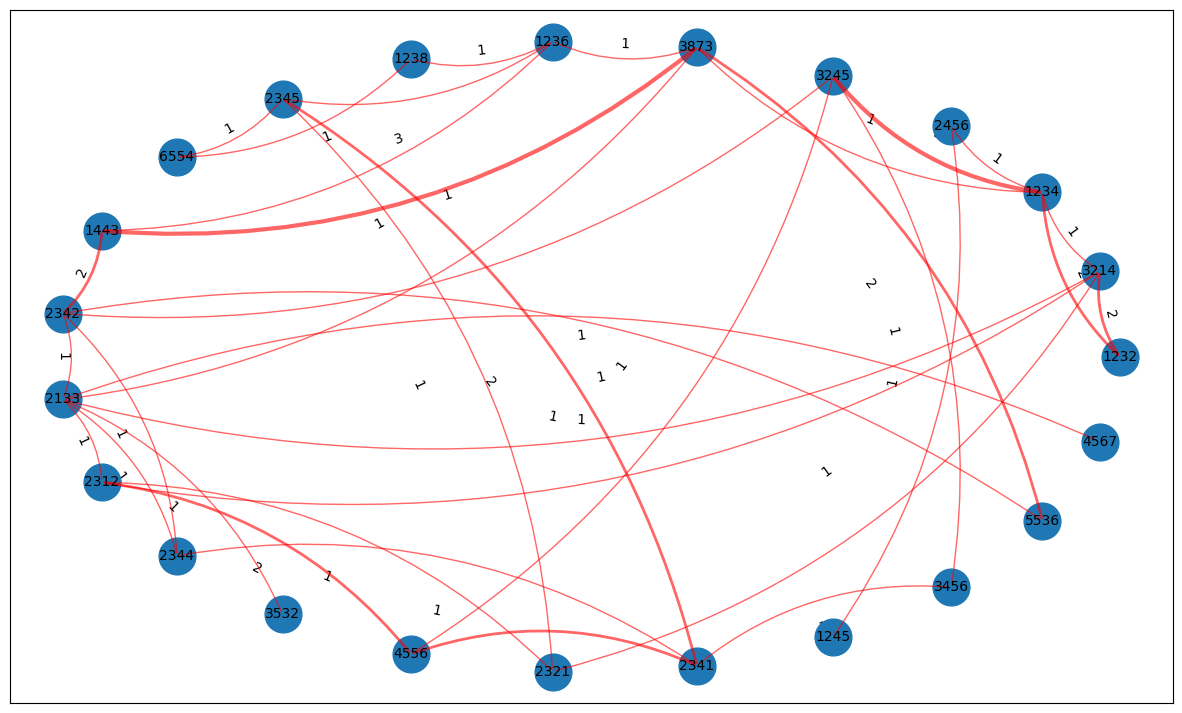

'mnode_x, mnode_y, mnode_txt = [], [], []\nedge_x, edge_y = [], []\nfor idx0, idx1 in G.edges():\n    x0, y0 = G.nodes[idx0]["pos"]\n    x1, y1 = G.nodes[idx1]["pos"]\n    edge_x.extend([x0, x1, None])\n    edge_y.extend([y0, y1, None])\n\n    mnode_x.extend([(x0 + x1)/2]) # assuming values positive/get midpoint\n    mnode_y.extend([(y0 + y1)/2]) # assumes positive vals/get midpoint\n    mnode_txt.extend([f"# {x0}"]) # hovertext\n'

In [33]:

plt.figure(figsize=(15,9))
ax = plt.gca()
pos=nx.circular_layout(G)

# nodes
sc = nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
edge_labels ={}


for source,target,edge in G.edges(data=True):
    rad = 0.2
    edge_labels[source,target]=edge
    arrowprops=dict(lw=G.edges[(source,target)]['amount'],
                    arrowstyle="-",
                    color='red',
                    connectionstyle=f"arc3,rad={rad}",
                    linestyle= '-',
                    alpha=0.6)
    ax.annotate("",
                xy=pos[source],
                xytext=pos[target],
                arrowprops=arrowprops
               )
# labels
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_family="sans-serif")
labels = nx.get_edge_attributes(G,'amount')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

"""mnode_x, mnode_y, mnode_txt = [], [], []
edge_x, edge_y = [], []
for idx0, idx1 in G.edges():
    x0, y0 = G.nodes[idx0]["pos"]
    x1, y1 = G.nodes[idx1]["pos"]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

    mnode_x.extend([(x0 + x1)/2]) # assuming values positive/get midpoint
    mnode_y.extend([(y0 + y1)/2]) # assumes positive vals/get midpoint
    mnode_txt.extend([f"# {x0}"]) # hovertext
"""

<AxesSubplot: >

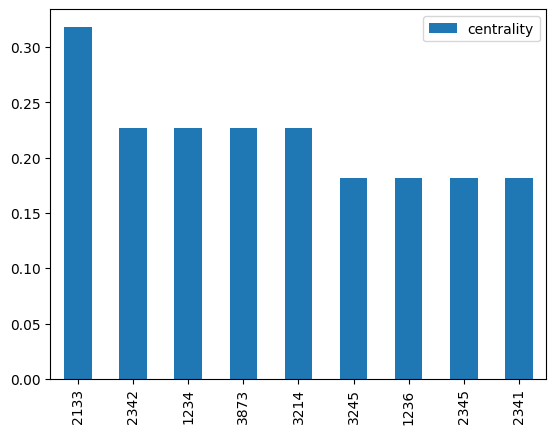

In [34]:
#Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

degree_df = pd.DataFrame.from_dict(degree_dict,orient='index',columns=['centrality'])
#plot top 10 nodes
degree_df.sort_values('centrality',ascending=False)[0:9].plot(kind="bar")


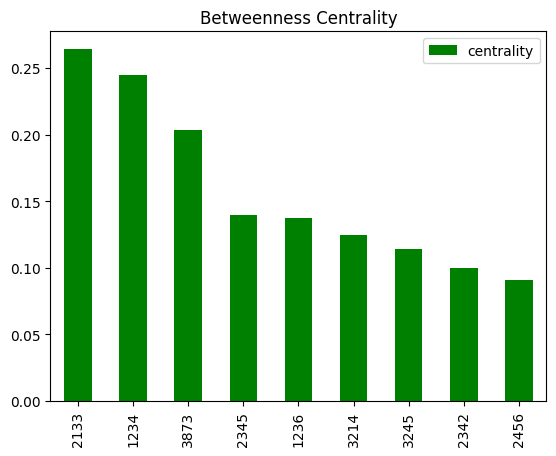

In [35]:
#Betweeness centrality 

betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='green')
plt.title('Betweenness Centrality')
plt.show();

In [36]:
betweenness_df.head()

centrality
1232    0.000000
3214    0.124603
1234    0.244877
2456    0.090909
3245    0.114286

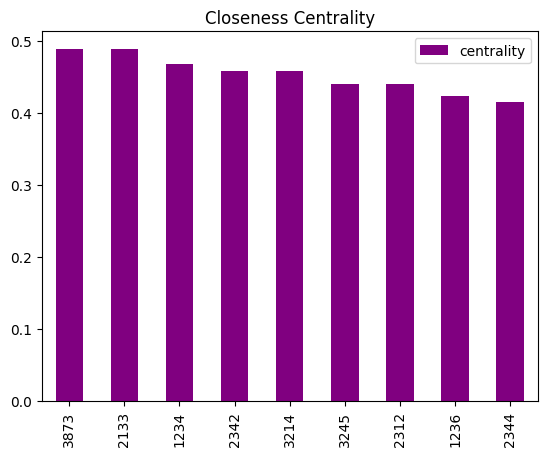

In [37]:
#Closeness Centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index',columns=['centrality'])

#Plot top 10 nodes

closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color='purple')
plt.title('Closeness Centrality')
plt.show();

In [38]:
closeness_df.head()

centrality
1232    0.372881
3214    0.458333
1234    0.468085
2456    0.333333
3245    0.440000

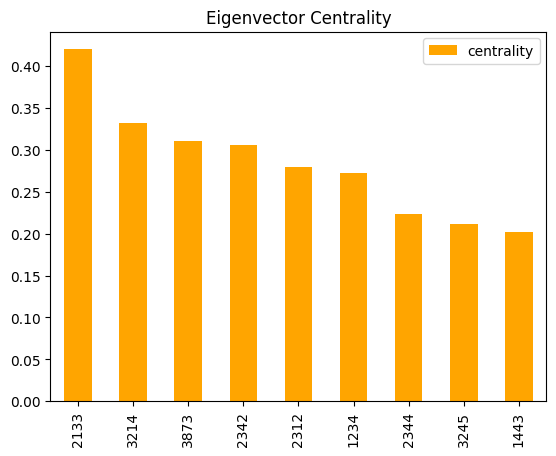

In [39]:
#Prestige/Eigenvector Centrality

prestige_dict= nx.eigenvector_centrality(G)
prestige_df = pd.DataFrame.from_dict(prestige_dict, orient='index',columns=['centrality'])


#Plot top 10 nodes

prestige_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar', color= 'orange')
plt.title('Eigenvector Centrality')
plt.show();

In [40]:
#Save centrality measures


nx.set_node_attributes(G, degree_dict, 'degree centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness centrality')
nx.set_node_attributes(G, prestige_dict, 'pestrige centrality')

In [41]:
# community detection
#community detection(Louvain)

import community as community_louvain

communities = community_louvain.best_partition(G)
communities



{1232: 1,
 3214: 1,
 1234: 1,
 2456: 1,
 3245: 3,
 3873: 0,
 1236: 2,
 1238: 2,
 2345: 2,
 6554: 2,
 1443: 0,
 2342: 0,
 2133: 0,
 2312: 1,
 2344: 0,
 3532: 0,
 4556: 3,
 2321: 1,
 2341: 3,
 1245: 1,
 3456: 3,
 5536: 0,
 4567: 0}

In [42]:
nx.set_node_attributes(G, communities, 'group')

In [51]:





fraud_net = Network(
    notebook=False,
    cdn_resources="remote",
    bgcolor="#222222",
    font_color="white",
    height="700px",
    width="100%",select_menu=True,filter_menu=True)


#set the physics layout of the network
fraud_net.barnes_hut()
df = pd.read_csv("C:\\Users\\Dhiraj\\Videos\\Fraud_Detection\\transactiondata.csv")
df.sort_values(by=['sourceA','destA'],inplace=True,ignore_index=True)
#grouping 
df = df.groupby(by=['sourceA','destA'],sort=False,as_index=False).count()
df['sourceA'] =  df['sourceA'].astype(str)
df['destA']=  df['destA'].astype(str)


sourceA = df['sourceA']
destA = df['destA']
amount = df['amount']
edge_data = zip(sourceA,destA,amount)
for e in edge_data:
    src = e[0]
    dst = e[1]
    w  =  e[2]
    fraud_net.add_node(src, src, title=src)
    fraud_net.add_node(dst, dst, title=dst)
    fraud_net.add_edge(src, dst, value=w)
    

neighbor_map = fraud_net.get_adj_list()
# add neighbor data to node hover data
for node in fraud_net.nodes:
    node["title"] += "->transactions from : " + \
    ",".join(neighbor_map[node["id"]])+"\n"
    node["value"] = len(neighbor_map[node["id"]])
    



fraud_net.force_atlas_2based()

fraud_net.show_buttons(filter_=True)
fraud_net.show("index.html")


